# 4교시 1.컨볼루션 신경망 실행하기
- 컴퓨터는 사람이 그림을 인식하는 것과 다르게 인식함
- 이미지 -> 숫자로 바꿈.
- 첫번째 픽셀부터 28*28=784. 784 node -> hidden layer.. -> last layer
- 픽셀 하나하나를 숫자로 바꾸어서 레이블이 되고, 그것을 레이블을 예측하는 것이 이미지 분류의 설명

## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical ## 원핫인코딩

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


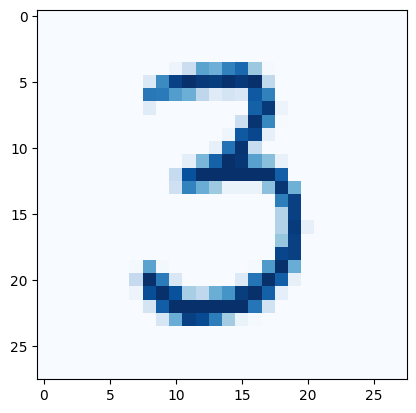

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[50], cmap='Blues')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[50]:
    for i in x:
        sys.stdout.write("%-3s" % i) #i라는 값을 문자열로 바꾸고, 왼쪽 정렬해서 최소 3칸을 차지하게 만들어 출력합니다.
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  12 56 14012617520096 2  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  35 16623825424624225324625467 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  18418214612770 30 45 36 2151750  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  30 0  0  0  0  0  0  0  20724614 0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  55 2511691  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  11 21523220 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  20 19025061 0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  24 11820625424814210818 0  0  0 

In [ ]:
print(X_train.shape) #3차원 28*28 데이터 6만개

(60000, 28, 28)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784) #(60000, 28*28)
X_train = X_train.astype('float64')
X_train = X_train / 255 #0~ 255는 숫자가 너무 크므로, 0~1사이의 숫자로 바꿈

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10) #원핫인코딩
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/04-01.png?raw=1" width="400"/>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback,checkpointer])
#verbose=1 (결과보여줌), 0 안보여줌
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1])) #[0] = loss, [1] = acc

Epoch 1/30
205/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0450
Epoch 1: val_loss improved from inf to 0.09353, saving model to ./MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9877 - loss: 0.0449 - val_accuracy: 0.9704 - val_loss: 0.0935
Epoch 2/30
210/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0307
Epoch 2: val_loss improved from 0.09353 to 0.09084, saving model to ./MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0308 - val_accuracy: 0.9725 - val_loss: 0.0908
Epoch 3/30
205/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9946 - loss: 0.0240
Epoch 3: val_loss improved from 0.09084 to 0.07877, saving model to ./MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0239 - val_accuracy: 0.9771 - val_loss: 0.0788
Epoch 4/30
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9958 - loss: 0.0162
Epoch 4: val_loss did not improve from 0.07877
225/

In [ ]:
print(X_test[0])
print("adskjfk")
print(y_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

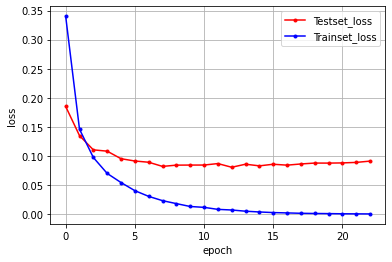

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 3. 컨볼루션 신경망 실행하기

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/04-02.png?raw=1" width="600"/>


**- covolution: 속성을 뽑아내서 특징만 간추리는 작업. 모든 픽셀에서 진행하면 비효율적이기 때문!!**

- 이미지 위에서 kernel이라 하는 마스크 하나가 이동하며, 해당 위치의 특성을 뽑아냄.
- 뽑아내는 단계: 첫번째칸, 두번째칸, 등등 칸마다 옵션이 다름.
- 해당 칸 만날때마다 두 값을 곱하고, 이미지와 커널의 곱셈을 모두 더해서 최종값을 결정
- 줄어듦 -> **커널이 돌아다니면서 이미지가 어떤 특성을 가지고 있는지 추출했음**. 4*4 -> 3*3이 같은 효과면서 컴퓨터 자원을 덜 사용
- 장점: 간과할 수 있었던 것 캐치 가능, 과적합 덜 일어남
- convolution 이외 -> 핵심만 골라서 다음 레이어로 전달하는 방법
- 커널을 여러개 만듦
- **맥스풀링**: 커널 n개 중에 가장 큰 값 하나만 남음 4*4 -> 2*2 (속성 유지한채로 컴퓨터 자원 줄일 수있다)
- **드롭아웃**: 일부 노드를 랜덤으로 끔. -> 과적합 방지, 컴퓨터 자원 줄임

=> convolution -> maxpooling -> dropout 순서대로 진행


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
#conv2d(out_channels, kernel_size=( , ), input_shape=())
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #-> 그래야 FF 통과할 수 있음. 2차원 -> 1차원으로 바꿔줘야함.
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.08695, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08695 to 0.06094, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.06094 to 0.05246, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.05246 to 0.05187, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.05187 to 0.04676, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04676 to 0.04425, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04425 to 0.04343, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss improved from 0.04343 to 0.04327, saving model to ./MNIST_CNN.keras

Epoch 9: val_loss improved from 0.04327 to 0.04221, saving model to ./MNIST_CNN.keras

Epoch 10: val_loss improved from 0.04221 to 0.03984, saving model to ./MNIST_CNN.keras

Epoch 11: val_loss did not improve from 0.03984

Epoch 12: val_loss did not improve from 0.03984

Epoch 13: val_loss did not improve

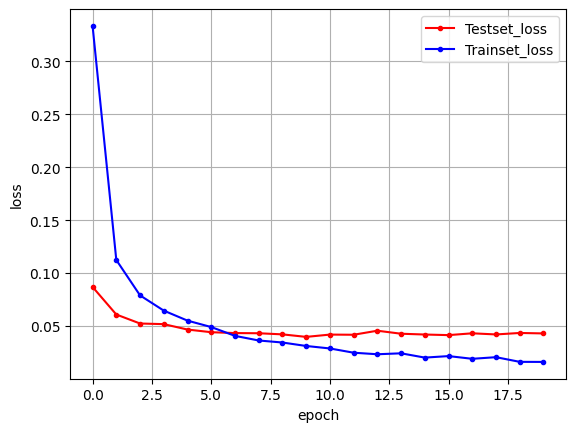

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

오답의 예

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/04-03.png?raw=1" width="400"/>